Group 5: Sam Young, Raveel Tejani

# Lab Notebook 7 - SVM

Today we will be learning how to use a Support Vector Machine (SVM) algorithm! Please refer to Chapter 4 of the textbook for details on this ML method.

# SVM from sklearn

## Step 1

Import the modules you will need (numpy, pandas, etc). We are using the following test data set. 

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import cm, pyplot as plt

X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)

print("The first column of X1 are the horizontal coordinates, and the second column are the vertical coordinates.")
print("\nFirst 5 elements of X1:")
print(X1[:5])
print("\nFirst 5 elements of y1:")
print(y1[:5])

The first column of X1 are the horizontal coordinates, and the second column are the vertical coordinates.

First 5 elements of X1:
[[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]

First 5 elements of y1:
[ 1  1  1  1 -1]


Visualize it in a plot with appropriate labels.

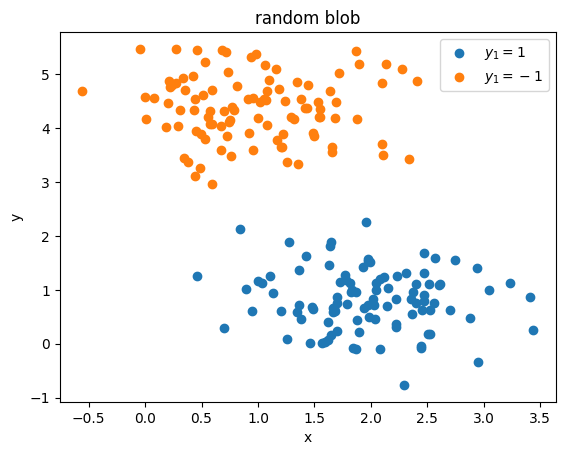

In [2]:
x_coord = X1[:,0]
y_coord = X1[:,1]

xplus = x_coord[y1==1]
yplus = y_coord[y1==1]

xminus = x_coord[y1==-1]
yminus = y_coord[y1==-1]

plt.scatter(xplus, yplus, label = "$y_1 = 1$")
plt.scatter(xminus, yminus, label = "$y_1 = -1$")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('random blob')
plt.show()

## Step 2

Let's first use svm.SVC(kernel='linear') to define our SVM ML model. Fit the model to the data above using three different values of C: 0.01, 1, and 1e10. Print the w1 and w2 values, as well as the b (intercept) value for each C-value. Display the results in a plot showing the data above and the three decision boundary lines. 

linear SVM model where C = 1e-02
      w1 = 0.16, w2 = -0.63
      intercept = 1.41
     
linear SVM model where C = 1e+00
      w1 = 0.30, w2 = -1.79
      intercept = 4.45
     
linear SVM model where C = 1e+10
      w1 = 0.59, w2 = -2.23
      intercept = 5.26
     


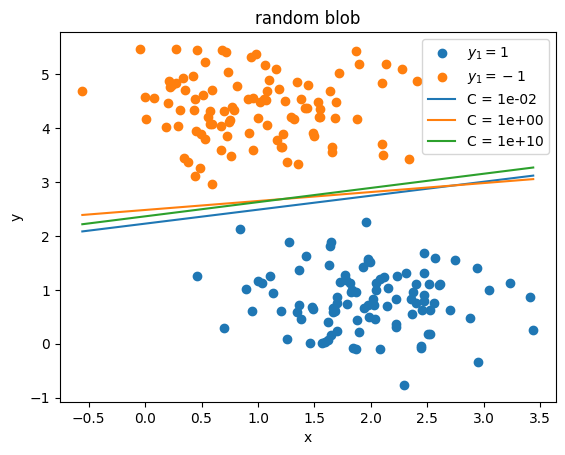

In [3]:
from sklearn import svm

Cs = [0.01, 1, 1e10]
w1s = []
w2s = []
intercepts = []
predictions = []


plt.scatter(xplus, yplus, label = "$y_1 = 1$")
plt.scatter(xminus, yminus, label = "$y_1 = -1$")
plt.xlabel('x')
plt.ylabel('y')
plt.title('random blob')

# transpose(w) * x + b = 0
# w1 * x + w2 * y + b = 0
# y = -w1/w2 - b/w2

for C in Cs:
    print("linear SVM model where C = {:.0e}".format(C))
    model = svm.SVC(kernel='linear', C = C)
    model.fit(X1,y1)
    predictions.append(model.predict(X1))
    w1, w2  = model.coef_[0]
    intercept = model.intercept_[0]
    w1s.append(w1)
    w2s.append(w2)
    intercepts.append(intercept)
    print('      w1 = {:.2f}, w2 = {:.2f}'.format(w1,w2))
    print('      intercept = {:.2f}'.format(intercept))
    print('     ')
    
    #### plotting
    
    x = np.linspace(min(x_coord), max(x_coord), 1000)
    y = -w1/w2 * x - intercept/w2
    plt.plot(x,y, label = "C = {:.0e}".format(C))
    
    
plt.legend()
plt.show()


## Step 3

Check wether the sklearn solution for w1, w2, and b for the three C-values chosen above indeed satisfies the following inequality (eqn 4.5 from the textbook) for all data points: 

y^i(wx+b)>=1, where w = [w1 w2] and x = [x1 x2]


For those data points that violate the inequality, print them out or, if you have time, show them in the plot you made above with different colours. Also print out by how much these data points violate the conditon. Do the trends make sense to you?

linear SVM model where C = 1e-02
 
x-coord:
[0.444 1.202 2.114 0.494 0.46  1.64  1.767 0.837 1.256 0.953 0.67  0.764
 2.085 1.428 1.684 0.893 1.975 1.961 1.271 0.488 1.645 1.777 1.218 0.376
 1.66  1.974 1.931 1.083 1.164 2.747 2.311 1.632 1.036 1.545 1.49  1.214
 0.529 2.097 2.469 1.106 1.351 2.227 1.989 2.106 0.59  0.347 1.362 1.495
 1.652 0.728 1.73  0.917 1.002 2.57  2.47  1.873 2.338]
 
y-coord:
[3.115 3.644 1.247 3.89  1.261 1.819 1.27  2.136 3.382 3.603 3.595 3.479
 1.194 1.624 4.196 1.011 1.544 2.252 1.893 3.268 1.893 1.187 3.893 3.377
 3.563 1.58  1.426 4.063 3.791 1.545 1.304 1.464 1.13  4.211 3.913 3.648
 3.808 3.717 1.679 1.264 3.343 1.263 1.51  3.495 2.97  3.452 1.366 3.858
 3.656 3.855 1.147 3.906 1.168 1.582 1.315 4.181 3.431]
 
points off by:
[0.512 0.302 0.032 0.03  0.312 0.472 0.103 0.804 0.477 0.287 0.246 0.335
 0.003 0.383 0.032 0.083 0.242 0.692 0.578 0.423 0.517 0.049 0.147 0.336
 0.429 0.265 0.175 0.018 0.203 0.116 0.035 0.248 0.135 0.    0.179 0.302
 0.088 0.403 

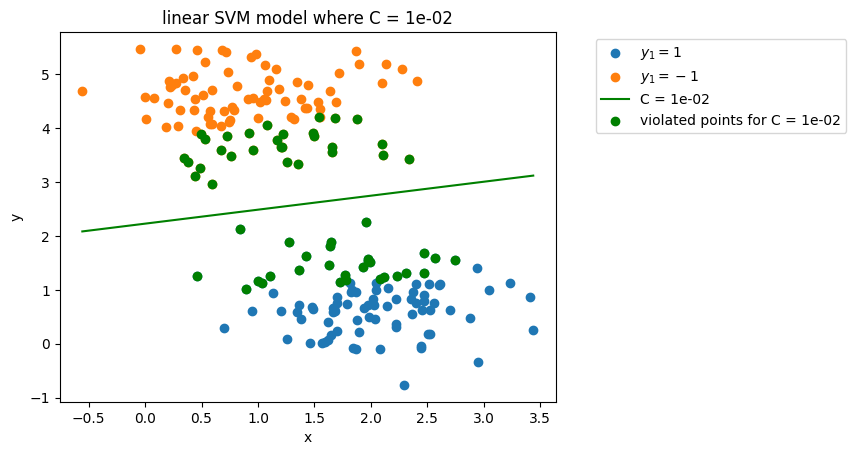

linear SVM model where C = 1e+00
 
x-coord:
[0.444 0.837 0.59 ]
 
y-coord:
[3.115 2.136 2.97 ]
 
points off by:
[0.    0.129 0.305]
 


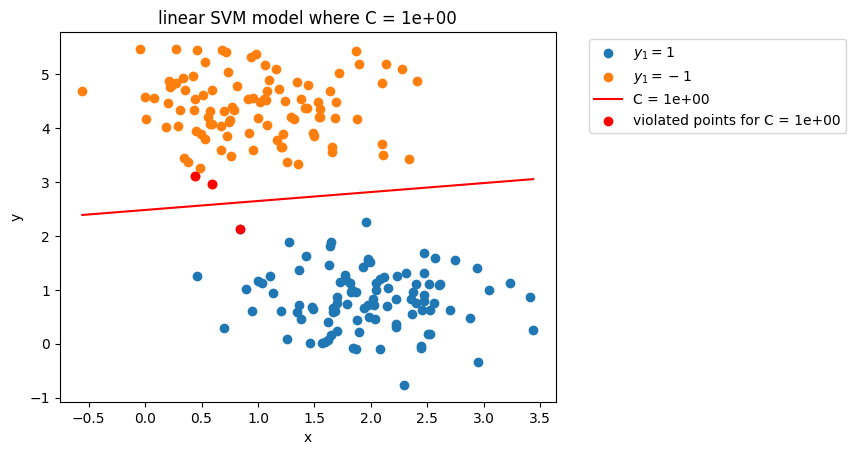

linear SVM model where C = 1e+10
 
x-coord:
[0.59]
 
y-coord:
[2.97]
 
points off by:
[0.]
 


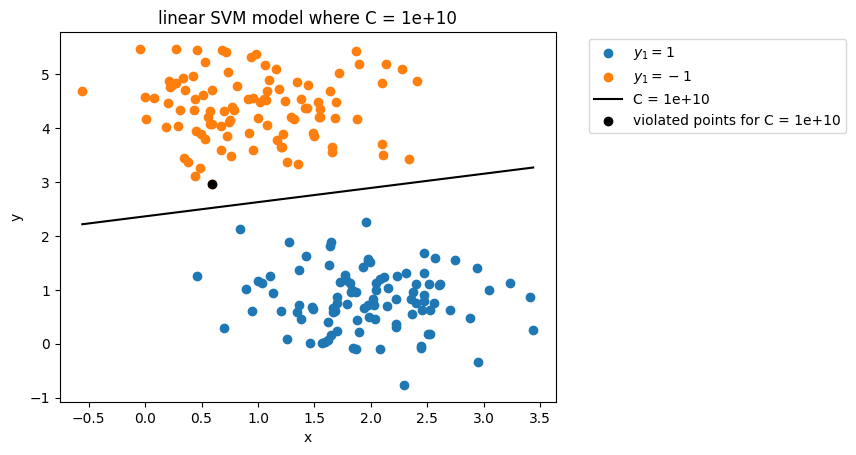

In [4]:


for i,C in enumerate(Cs):
    plt.scatter(xplus, yplus, label = "$y_1 = 1$")
    plt.scatter(xminus, yminus, label = "$y_1 = -1$")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("linear SVM model where C = {:.0e}".format(C))
    colors = ['green','red','black']
    print("linear SVM model where C = {:.0e}".format(C))
    print(" ")
    prediction = predictions[i]
    w1 = w1s[i]
    w2 = w2s[i]
    intercept = intercepts[i]
    condition = y1 * (w1 * x_coord + w2 * y_coord + intercept)
    off_by = condition[condition<1]
    x_coord_viol = x_coord[condition<1]
    y_coord_viol = y_coord[condition<1]
    
    x = np.linspace(min(x_coord), max(x_coord), 1000)
    y = -w1/w2 * x - intercept/w2
    plt.plot(x,y, label = "C = {:.0e}".format(C), color = colors[i])
    plt.scatter(x_coord_viol, y_coord_viol, label = "violated points for C = {:.0e}".format(C),
                color = colors[i])
    
    print('x-coord:')
    print(np.round(x_coord_viol,3))
    print(" ")

    print('y-coord:')
    print(np.round(y_coord_viol,3))
    print(" ")

    print('points off by:')
    print(np.round(1 - off_by, 3))
    print(" ")
    plt.legend(bbox_to_anchor=(0.6, 0, 1, 1))
    plt.show()




the trend in violated points makes sense. With larger values of C -> we demand a stricter model that classifies the training data correcly, thus the larger the C the lower the points violated. Larger C creates a smaller-margin hyperplane.